In [231]:
import sys
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pathlib

# modify the sys.path to include the source directory
src_dir = pathlib.Path().absolute().parent
sys.path.append(str(src_dir))

from src.enums import DataSplit
from src.datasets.bbox import BoundingBoxDetectionDataset
from src.enums import DataSplit
from src.utils.transforms import BBoxResize, BBoxBaseTransform, BBoxCompose, BBoxCocoToCenterFormat, BBoxRotation, BBoxReflection, BBoxRandomCrop
from src.utils.bbox import generate_anchors
from matplotlib.patches import Rectangle

In [232]:
DATASETS_ROOT = src_dir / 'datasets'
BATCH_SIZE = 1
transform = BBoxCompose([BBoxBaseTransform(), BBoxResize((256, 256)),BBoxCocoToCenterFormat(), BBoxRandomCrop()])
dataset = BoundingBoxDetectionDataset(root_dir=DATASETS_ROOT, split=DataSplit.TRAIN, transform=transform)
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

In [233]:
img, b = next(iter(data_loader))
img = img[0]
b = b[0]

[113.15 130.25  49.5   48.5 ]
torch.Size([3, 256, 256])
51
3
253
1 2
torch.Size([3, 253, 253])
[113.4798419  129.77075099  49.5         48.5       ]


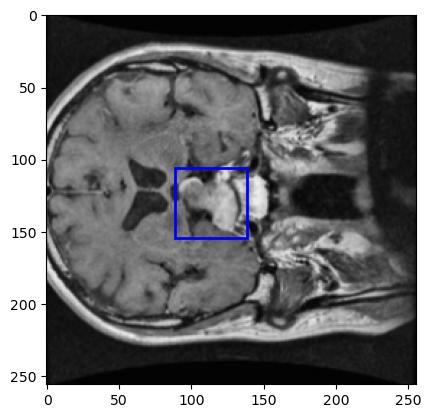

In [234]:
plt.imshow(img.permute(1, 2, 0).numpy(), cmap="gray")
rect = Rectangle(
        (b[0] - b[2]/2, b[1] - b[3]/2), b[2], b[3], linewidth=2, edgecolor="b", facecolor="none"
    )
plt.gca().add_patch(rect)

In [235]:
b

tensor([113.4798, 129.7708,  49.5000,  48.5000], dtype=torch.float64)